In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])

In [21]:
# shape
print(diabetes_df.shape)

(442, 11)


In [22]:
# descriptions
print(diabetes_df[['age']].describe())

                age
count  4.420000e+02
mean  -3.634285e-16
std    4.761905e-02
min   -1.072256e-01
25%   -3.729927e-02
50%    5.383060e-03
75%    3.807591e-02
max    1.107267e-01


In [23]:
# datatype
diabetes_df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [24]:
# information
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [25]:
diabetes_df.corr

<bound method DataFrame.corr of           age       sex       bmi  ...        s5        s6  target
0    0.038076  0.050680  0.061696  ...  0.019908 -0.017646   151.0
1   -0.001882 -0.044642 -0.051474  ... -0.068330 -0.092204    75.0
2    0.085299  0.050680  0.044451  ...  0.002864 -0.025930   141.0
3   -0.089063 -0.044642 -0.011595  ...  0.022692 -0.009362   206.0
4    0.005383 -0.044642 -0.036385  ... -0.031991 -0.046641   135.0
..        ...       ...       ...  ...       ...       ...     ...
437  0.041708  0.050680  0.019662  ...  0.031193  0.007207   178.0
438 -0.005515  0.050680 -0.015906  ... -0.018118  0.044485   104.0
439  0.041708  0.050680 -0.015906  ... -0.046879  0.015491   132.0
440 -0.045472 -0.044642  0.039062  ...  0.044528 -0.025930   220.0
441 -0.045472 -0.044642 -0.073030  ... -0.004220  0.003064    57.0

[442 rows x 11 columns]>

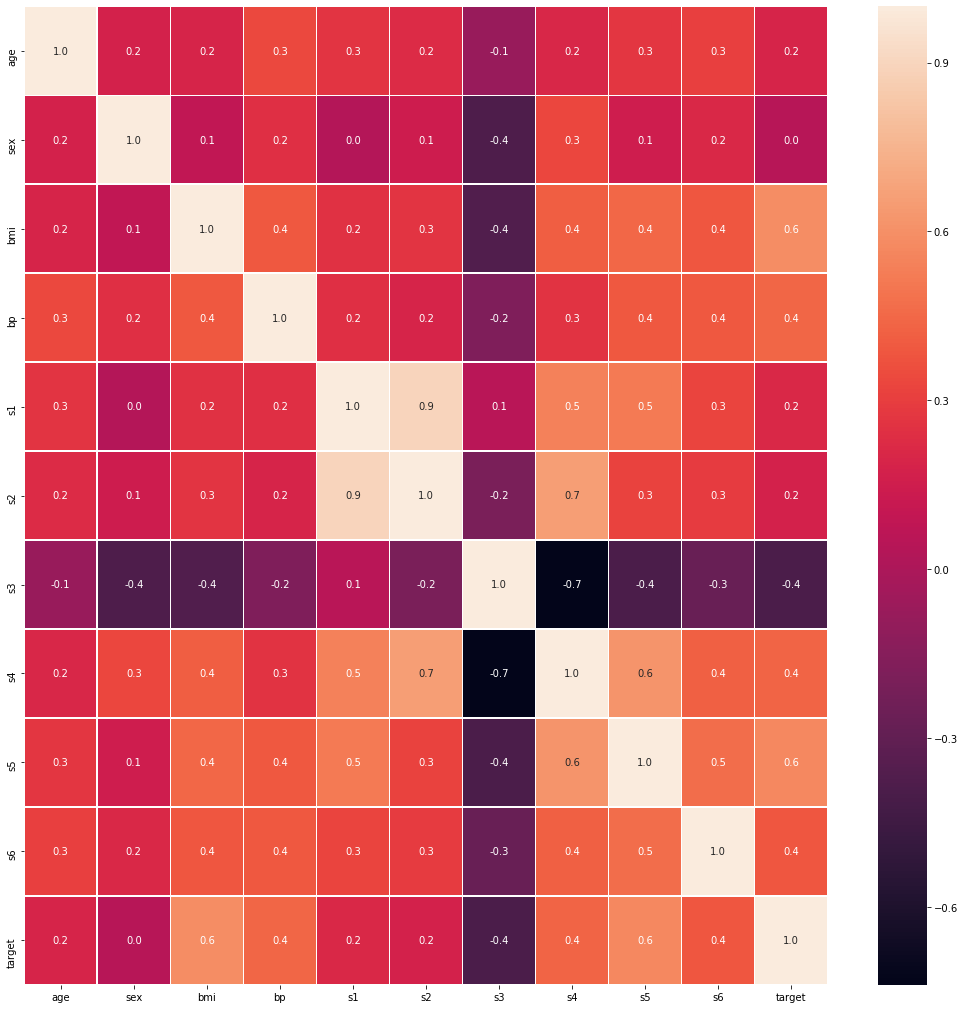

In [27]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(diabetes_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [29]:
diabetes_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes.target, test_size=0.20, random_state=5)

In [31]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = regr.predict(X_test)
print(y_pred)

[171.27316713 223.87670856 112.5999863  144.97139641 191.50529845
 128.78569136 143.95978985 221.85349543 157.1106752  203.64457724
  72.13572366 198.58654441 148.00621611 148.00621611 207.69100351
 131.82051105 138.90175702  97.42588781  92.36785498 115.634806
 112.5999863  129.79729792 130.80890449 184.42405249 122.71605196
 102.48392064 280.52667626 212.74903634 129.79729792 134.85533075
 129.79729792 119.68123226 129.79729792 130.80890449 150.02942924
 139.91336358 208.70261007 150.02942924 167.22674087  79.21696962
 100.46070751 142.94818328 239.05080705 131.82051105 140.92497015
 125.75087166 216.7954626   91.35624841 183.41244592 140.92497015
 231.96956109 132.83211762 227.92313483 218.81867573 202.63297068
 120.69283883 127.77408479  83.26339588 188.47047875 194.54011815
 108.55356003 170.26156056 134.85533075 156.09906864 136.87854388
 211.73742977 215.78385604 151.04103581 188.47047875 157.1106752
 165.20352773 169.249954   167.22674087 153.06424894 170.26156056
 155.08746207

Coefficients: 
 [938.57416386]
Mean squared error: 4391.82
Mean absolute error: 55.51


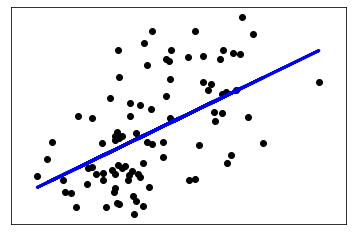

In [33]:
from sklearn import metrics

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
      % metrics.mean_absolute_error(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show() 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df[diabetes['feature_names']], diabetes.target, test_size=0.30)
  # Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [36]:
 # The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
      % metrics.mean_absolute_error(y_test, y_pred))


Coefficients: 
 [   18.39974118  -200.32263826   497.60709507   330.75698503
 -1032.61592923   643.86705698   217.47194565   214.73813097
   815.73626849    80.83601257]
Mean squared error: 3123.93
Mean absolute error: 44.98
